
## Convolutional Neural Network (CNN)

A Convolutional Neural Network (CNN) is a type of deep learning model specifically designed for processing structured grid data, such as images. CNNs are particularly effective for image classification tasks due to their ability to capture spatial hierarchies in data.



In [25]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

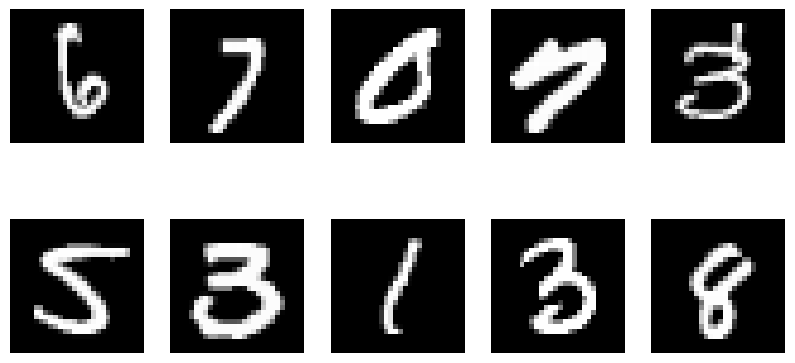

In [27]:

random_indices = np.random.choice(X_train.shape[0], 10, replace=False)

# Plot the images
plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
plt.show()

In [29]:
X_train.ndim

3

In [30]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [31]:
X_train.shape

(60000, 28, 28, 1)

In [32]:
#Feature Scaling
X_train = X_train/255
X_test = X_test/255

In [34]:
#Split dataset
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)


In [35]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

c:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 804,554 (3.07 MB)

 Trainable params: 804,554 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [38]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8941 - loss: 0.3509 - val_accuracy: 0.9743 - val_loss: 0.0880
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9812 - loss: 0.0598 - val_accuracy: 0.9804 - val_loss: 0.0675
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9902 - loss: 0.0340 - val_accuracy: 0.9855 - val_loss: 0.0508
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9928 - loss: 0.0230 - val_accuracy: 0.9817 - val_loss: 0.0645
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9961 - loss: 0.0124 - val_accuracy: 0.9794 - val_loss: 0.0794
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9968 - loss: 0.0113 - val_accuracy: 0.9843 - val_loss: 0.0624
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9978 - loss: 0.0077 - val_accuracy: 0.9823 - val_loss: 0.0703
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9972 - loss: 0.0081 - 

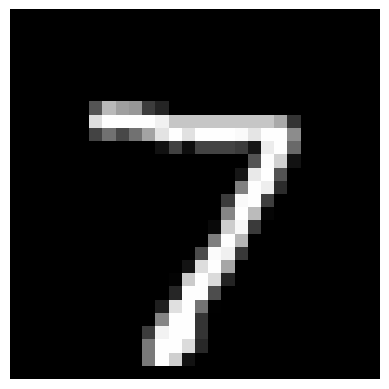

In [42]:
plt.imshow(X_test[0], cmap='gray')
plt.axis('off')
plt.show()

In [48]:
predict = np.argmax(model.predict(np.expand_dims(X_test[0],axis=0)).round(2))
print(f'Prediction: {predict}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: 7


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


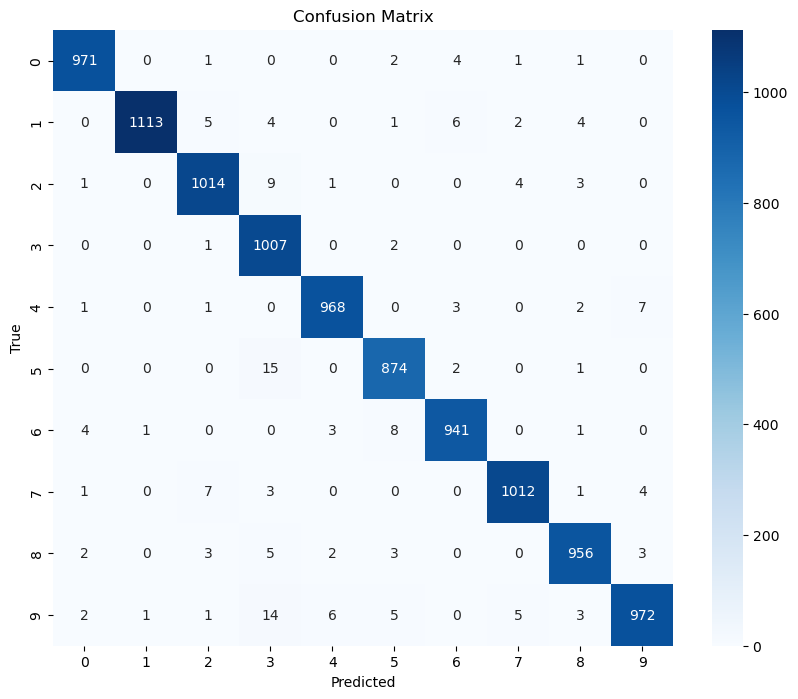

In [49]:
from sklearn.metrics import confusion_matrix

# Predict the labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()